# Final Report: Predicting Recessions with Unlikely Indicators

## Summary and Main Findings 

Our group intended to create a means of predicting if the U.S. economy as a whole showed signs of approaching a recessionary period by observing the values of a chosen set of factors. We included well-known recessionary indicators that are widely used by economists, as well as other data that we thought would be interesting and could also be a tell of the state of the economy. For our common indicators we chose the Consumer Confidence Index (CCI), 10-Federal Funds Rate Spread, Normalized GDP, Total Manufacturing Employement, and Inflation; for these indicators we knew that lower data points during a time period would typically point to lower faith in the economy as with the CCI or a slowing period in the economy. For unlikely indicators who chose Alcohol Sales by volume and the Price of Copper. Through our research we assumed that Alcohol Sales would increase during a recession and that the price of copper would fall as construction projects slow or pause. We collected data from 1967- 2021 and merged it into one dataframe on date. The purpose of our model was to predict whether the data on its collected date indicated a recessionary or non-recessionary period by assigning either a 0 (non) or 1 (recession). Through the use of three models: logistic regression, random forest, and gradient boosted trees we analyzed how accurately each model predicted a recession when an actual recession occurred. We found that gradient boosted trees was the most effective model at predicting a recession early and accurately. However, analysis of our indicators show that alcohol sales by volume and the price of copper were not a predictive indicator of a recessionary period and were not weighted heavily in our model. 

## Introduction and Outline of Approach 

As college students studying business and finance, we have a unique perspective through experiencing a recessionary period that was brought upon as a result of the COVID-19 pandemic. We wanted to see for ourselves the important signs that indicate or react to a slowing of the economy. Determining when a recession may be coming is greatly important for the purpose of preparation and readiness. A slowing of the economy may result in a loss of jobs, a decrease in the money supply and spending, and overall harship for many Americans. 

The CCI examines the attitudes of consumers given their expected, future financial status. It determines the overall optimism or pessimism for the state of the economy. An increase in the CCI would likely indicate more consumption and spending, where a decrease would indicate saving and less consumption. The 10-Federal Funds Rate Spread is also a likely indicator of a recessionary period. Lower interest rates suggest an encouragement for consumers to borrow and spend and is a disincentive to saving, whereas higher interst rates incentivise saving. Gross Domestic Product (GDP) is also a strong predictor for the state of the economy; a greater GDP indicates healthy consumption and greater spending whereas lower GDP would be representative of a decrease in the money supply and economic struggle. We used the percent change in Total Manufacturing Employment as another correlated indicator for recession. Often with a recession there is a loss of jobs and we were able to caputure this with the TME metric. Lastly, we included inflation because in a recession inflation would be expected to fall due to a decrease in both consumer demand and economic activity. 

College, for many, is often a time that is associated with alcohol consumption, so we thought it would be interesting to see if greater U.S. alcohol sales were a predictor for the onset of a recessionary period. We assumed that increased demand would be a result of economic hardships and personal struggling. We chose copper because it is a material that is often used in construction and manufacturing and we predicted that demand for copper would drop during a recession as decreased money supply would slow or stop construction projects. We created the three models to produce a predicted recession result for each date of collected data and then compared the output to when an actual recession occurred. We also explored what indicators were deemed most important to the mdel at the end of the time series and which were largely ignored. 

We split our merged indicator data into three subgroups: initial fitting 1967-1980, time series fitting: 1980-2010, and testing data: 2010 to 2021.  

## Data 

Luckily, most of our data is well tracked and widely available. From the FRED Economic Database we loaded the following data: 

- Actual Recession Indicator
- 10yr minus Federal Funds Rate Spread 
- Normalized U.S. GDP
- Consumer Confidence Index
- Purchases of Alcoholic Products
- Price of Copper 

All data can be found in our data folder as csv files and were loaded in our data_exploration python file. In this file we merged all the data on date into a dataframe called indicators. Due to the increasing of raw data values over time, we had to normalize alcohol sales and price of copper and created a column with the percent change for each time interval. We then normalized the alcohol consumption data by using a rate of change month to month instead of raw values. We determined that the raw values of the CCI, normalized GDP, and the 10-FF yield spread were apropriate since the values are not uniformally changing over time. We also created percent change columns for manufacturing employment and inflation since recessionary periods see sharp declines in these metrics. After cleaning our data, the next step was to perform EDA to visualize what our data consisted of. Below are line plots of our cleaned indicator data. Examining the raw value data of alcohol, copper, and manufacturing employment it 

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

array([[<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
        <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
        <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
        <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
        <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>]],
      dtype=object)

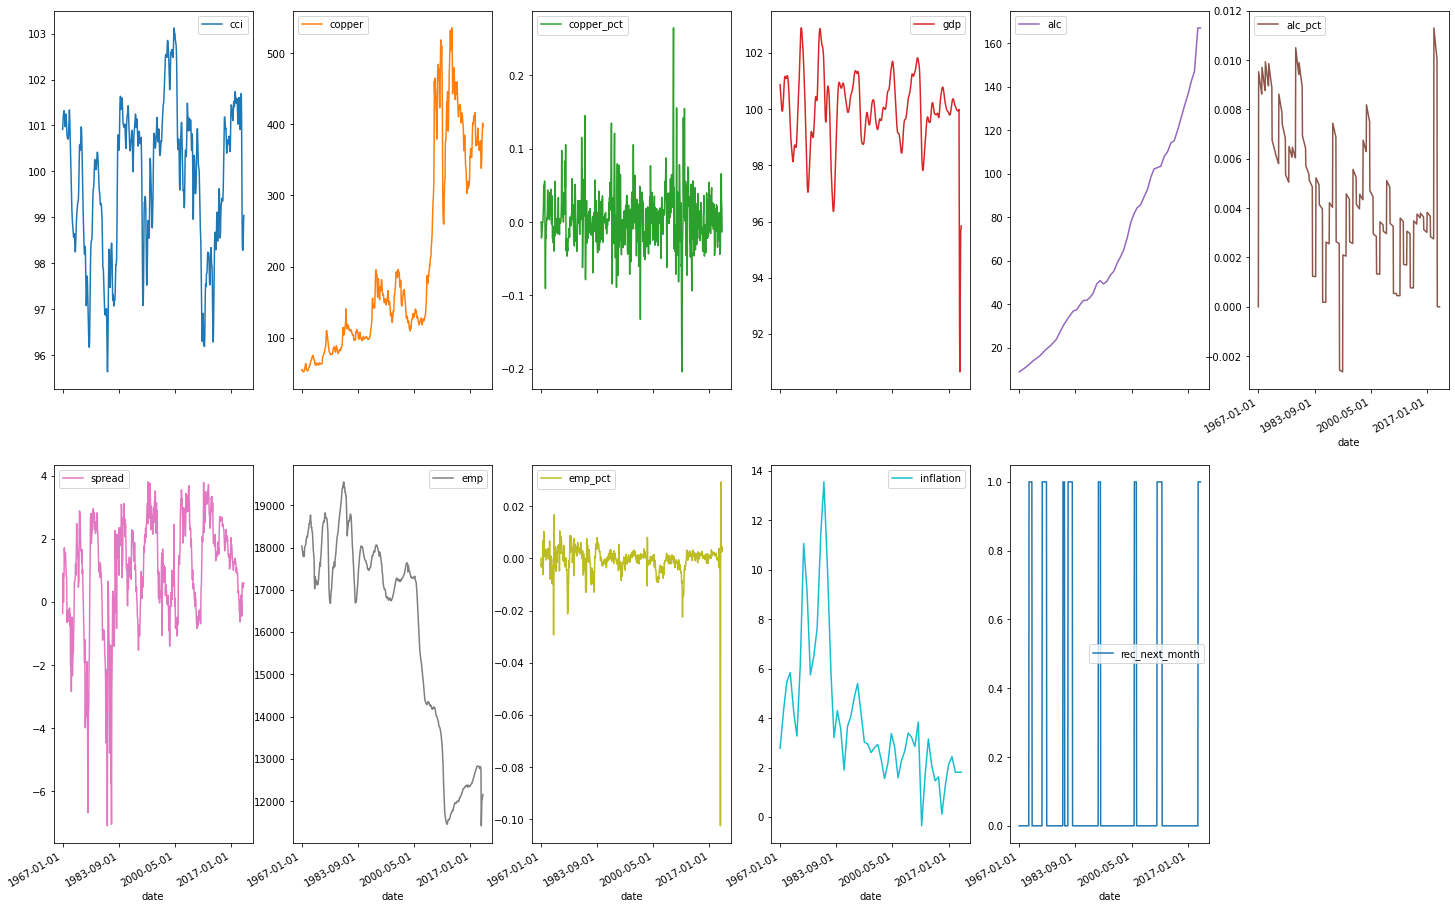

In [2]:
indicators = pd.read_csv('data/full_time_indicators.csv')
indicators=indicators.drop('Unnamed: 0', axis=1)
indicators.plot(x='date', subplots=True, layout=(2,6), figsize=(25,17))

## Our Models 

We chose three models that we thought would work best with our data 
1. Logistic Regression
2. Random Forest
3. Gradient Boosted Trees

We decided to do our initial model fitting on a subgroup of data from 1967-1980, leaving us with plenty of time left to further develop our models. For each model, the estimator is fitted on the first group of years and then is analyzed over a time series of 1980-2010, with the models being refitted with each new month of data. This allows us to see how the parameter use over time changes as the models grow and develop as more data is added. Additionally, each model is represented with a dataframe of predicted and actual values. These groups of data are used further in the analyze_models file. 

We tuned each model differently in an effort to produce the best results. 

Logistic Regression: 
- Class weight: balanced, ensures that the weights of each class are adjusted inversely proportional to class frequencies. This was a conscious decision made after comparing different weighting methods 

Random Forest & Gradient Boosted Trees:
- These models were tuned using cross validation to determine optimal parameters 
- There is a difference between n_estimators - since gradient boosting is less inclined to overfitting, we can use slightly more estimators here to boost accuracy 

### Model Manipulation 

Model 1: Logistic Regression
1. Set parameters: ‘max_iter’ and ‘class_weight’
1. Fit to training data before 1980
1. Incorporating more data, one month at a time in a series , from 1980 to 2010
1. Get the weights of each indicator, and the prediction, at each time interval
1. Merge factor weights into combined dataframe = logi_results
1. Create dataframe for the classification report using predicted and actual recession values = logi_class_rep
1. Save both df’s to CSV files in the outputs folder for further analysis

Model 2: Random Forest
1. Input parameters: ‘bootstrap’, ‘class_weight’, ‘min_samples_leaf’, ‘min_samples_split’, ‘n_estimators’
1. Fit each model on period 1967-1980, and perform time series analysis from 1980-2010
1. Create Random Forest model with RandomForestClassifier and fit x and y_train data
1. Create coefficient lists for each variable
1. Get all the predictions
1. Add dates and combine into one df = rf_results
1. Create dataframe for the classification report = rf_class_rep
1. Save both df’s to CSV files in the outputs folder for further analysis

Model 3: Gradient Boosted Trees
1. Input parameters: ‘learning_rate’, ‘n_estimators’, ‘verbosity’, ‘use_label_encoder’
1. Fit each model on period 1967-1980, and perform time series analysis from 1980-2010
1. Create Gradient Boosted Trees model with XGBClassifier and fit data
1. Create coefficient lists for each variable
1. Get all the predictions
1. Add dates and combine into one df = gb_results
1. Create dataframe for the classification report = gb_class_rep
1. Save both df’s to CSV files in the outputs folder for further analysis


## Analysis 

For each model we outputted 1) line plots that represented how heavily each indicator was weighed as a predictor of recession, as how these changed over time, 2) the most important factor weight and the least important factor weight, 3) a regression report that indicated the model's precision in correctly predicting a recession and 4) side by side plots of each models recession prediction compared to actual recession data.

### Logistic Regression 
- Most Positive Factor Weight: GDP 0.9211
- Least Important Factor Weight: copper_pct -0.0570

### Random Forest 
- Most Positive Factor Weight: emp_pct 0.2681
- Least Important Factor Weight: copper_pct 0.0159

### Gradient Boosted Trees  
- Most Positive Factor Weight: GDP 0.1619
- Least Important Factor Weight: Copper 0.0162 

Based on the results of each of the models, we concluded that Gradient Boosted Trees was the most effective at predicting a recession early and accurately when comparing actual recession data. 

The graphs below show each of the time series factor weightings, and their development over the period 1980-2010.

In [1]:
import pandas as pd 
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from time_series import factorWeightings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
logi_results = pd.read_csv('outputs/logit_coefs.csv')
logi_class_rep = pd.read_csv('outputs/logit_rep.csv')
rf_results = pd.read_csv('outputs/rf_coefs.csv')
rf_class_rep=pd.read_csv('outputs/rf_rep.csv')
gb_results = pd.read_csv('outputs/gb_coefs.csv')
gb_class_rep=pd.read_csv('outputs/gb_rep.csv')
del logi_results['Unnamed: 0']
del logi_class_rep['Unnamed: 0']
del rf_results['Unnamed: 0']
del rf_class_rep['Unnamed: 0']
del gb_results['Unnamed: 0']
del gb_class_rep['Unnamed: 0']

## Logistic Regression Factor Weightings

array([[<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>]], dtype=object)

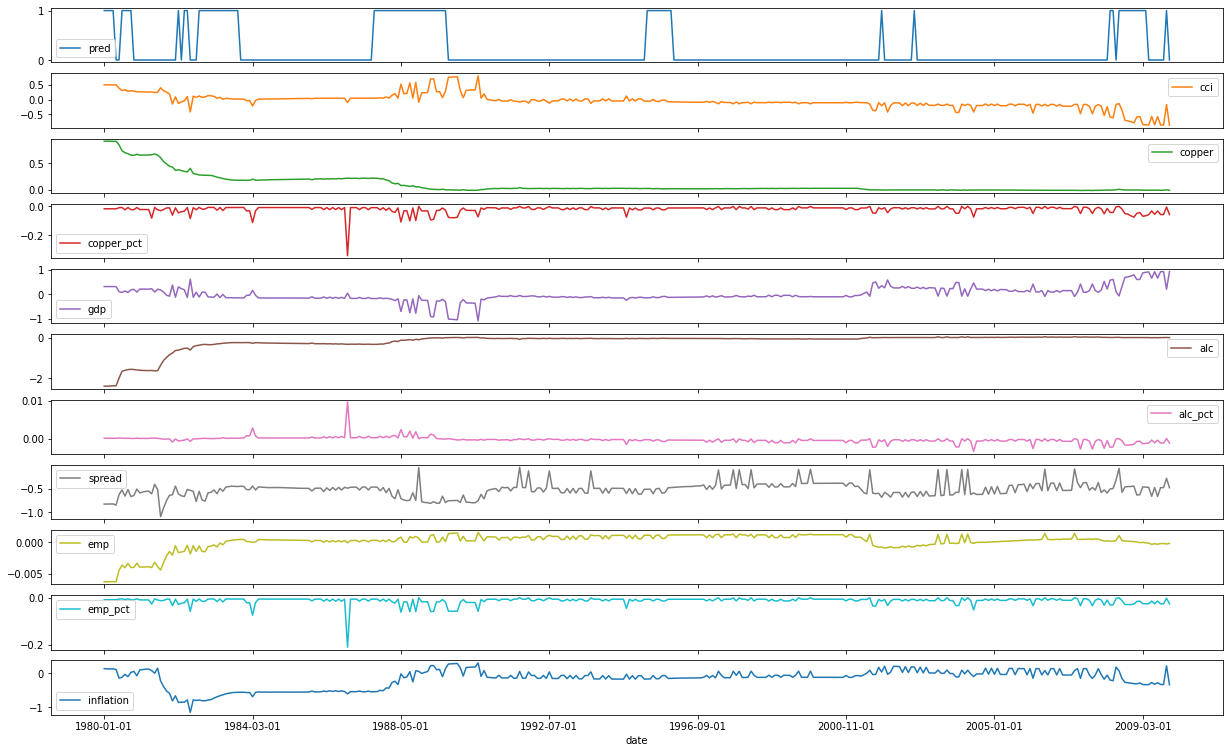

In [3]:
logi_results.plot(x='date', subplots=True, layout=(11,1), figsize=(21,13))

## Random Forest Factor Weightings

array([[<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>]], dtype=object)

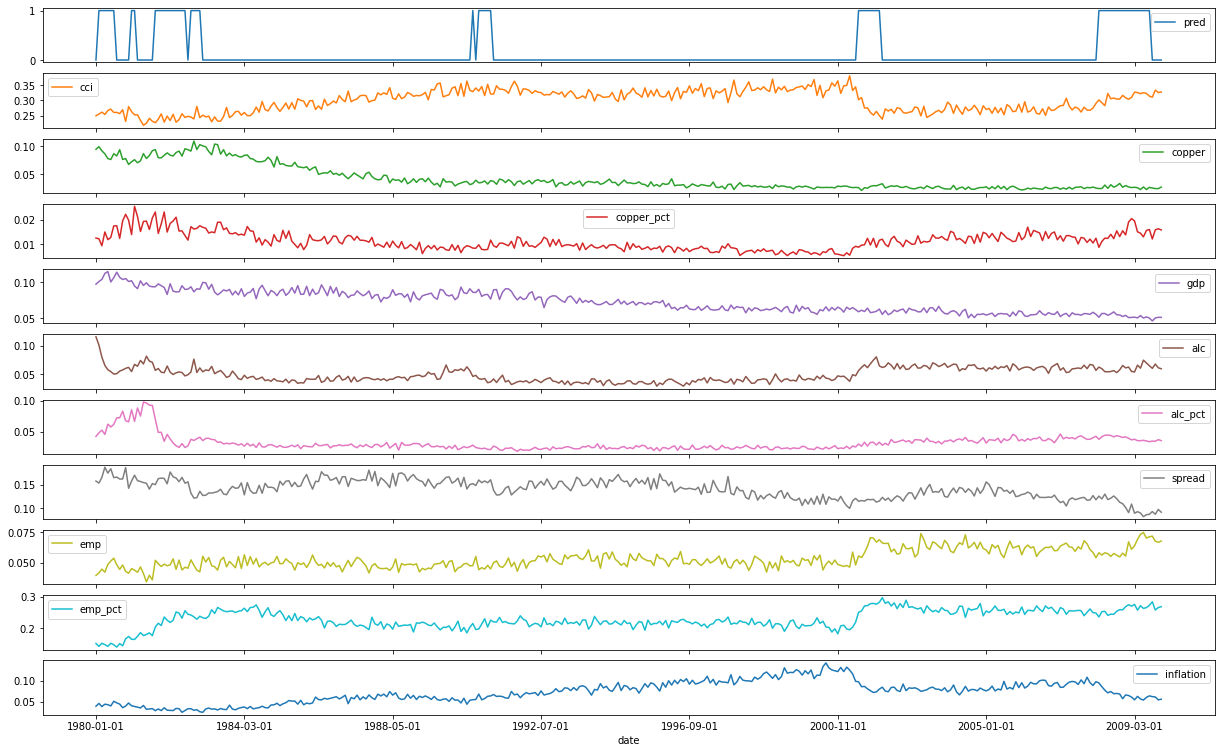

In [4]:
rf_results.plot(x='date', subplots=True, layout=(11,1), figsize=(21,13))

## Gradient Boosted Trees Factor Weightings

array([[<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>]], dtype=object)

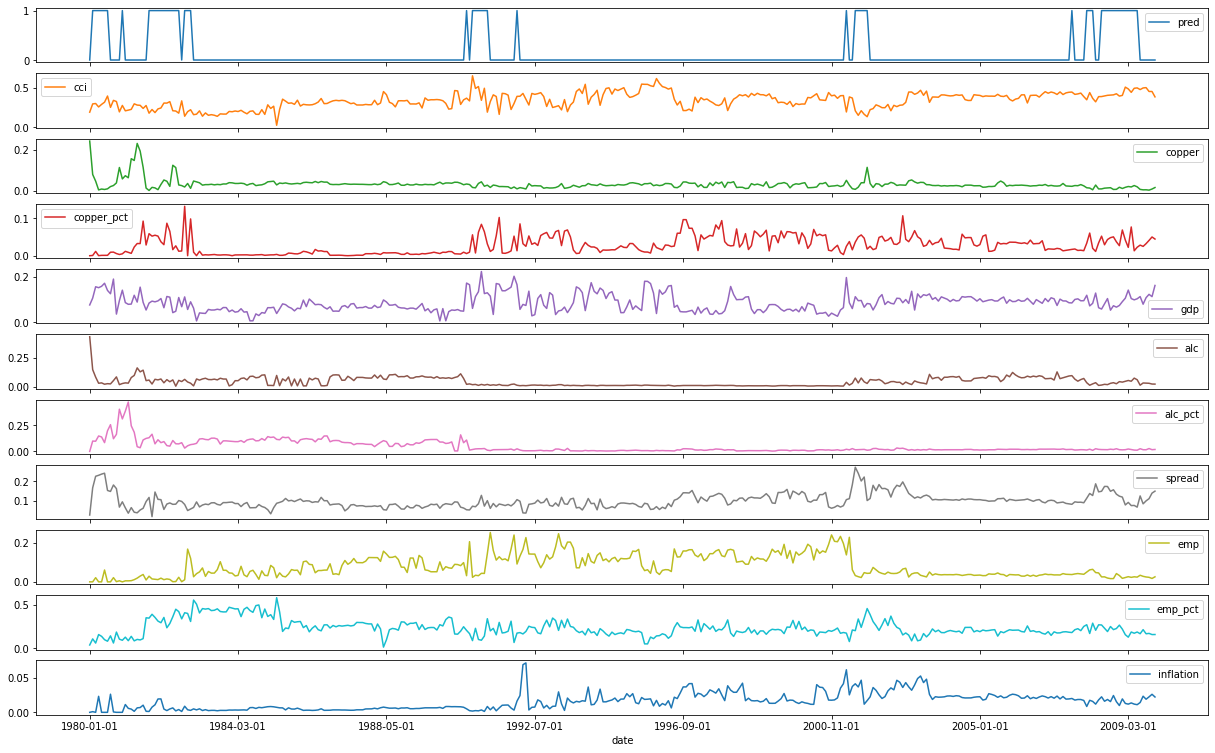

In [5]:
gb_results.plot(x='date', subplots=True, layout=(11,1), figsize=(21,13))

As demonstrated in our time series analysis, factors relating to alcohol and copper are consistently the least reliable indicators of a recession, at least according to our models. This is somewhat expected, as we included these factors as variables you would not typically see used in recession prediction, but could still provide insight. Additionally, these variables are not leading indicators, further decreasing their reliability as predictors. Conversely, variables like GDP, CCI, and the manufacturing employment were relied on more heavily in making our predictions. 

## Logistic Regression - Plot of Predicted vs Actual Recessions

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

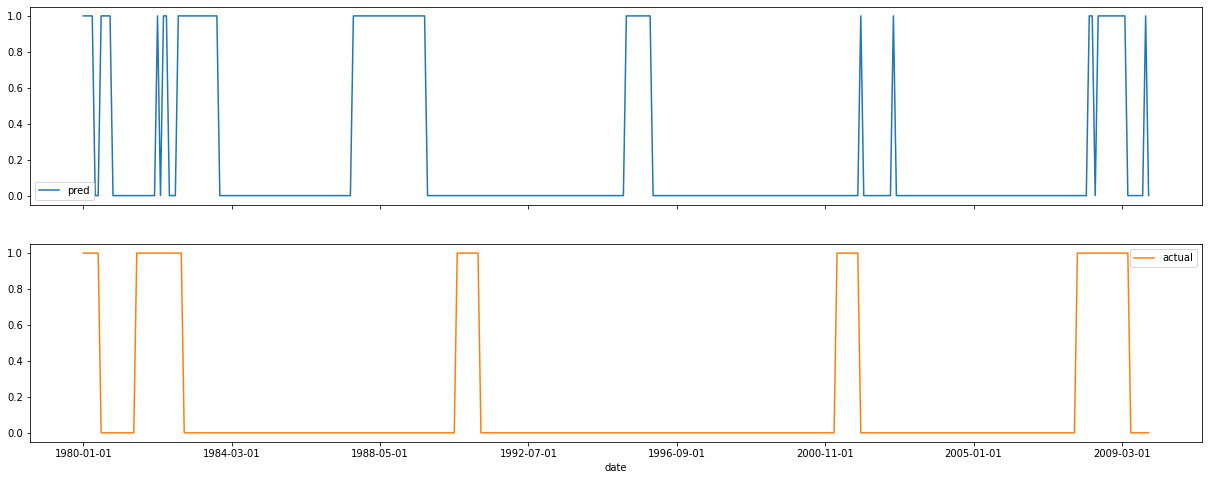

In [8]:
logi_class_rep.plot(x='date', subplots=True, figsize=(21,8))

## Random Forest - Plot of Predicted vs Actual Recessions

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

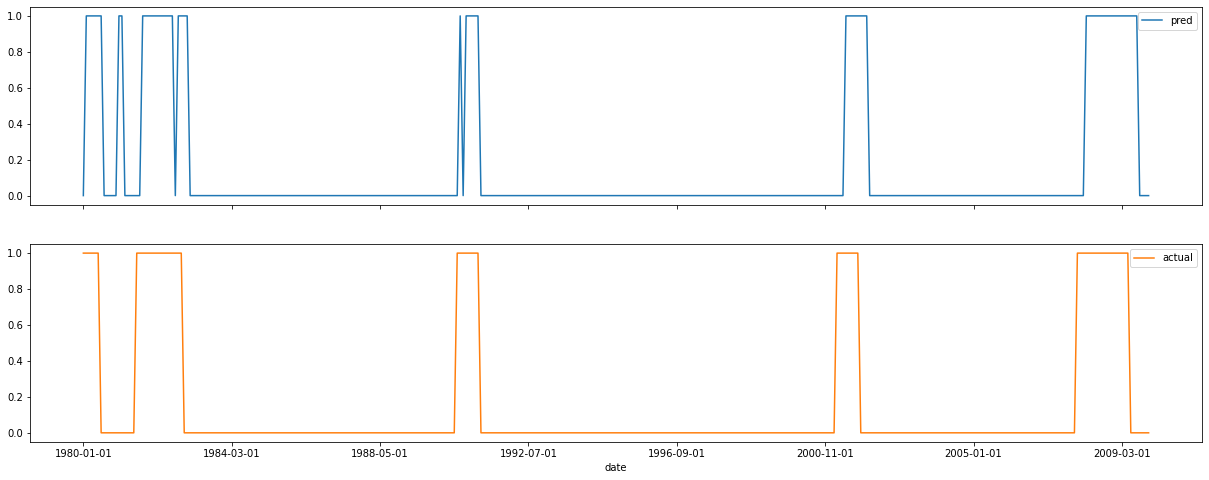

In [6]:
rf_class_rep.plot(x='date', subplots=True, figsize=(21,8))

## Gradient Boosted Trees - Plot of Predicted vs Actual Recessions

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

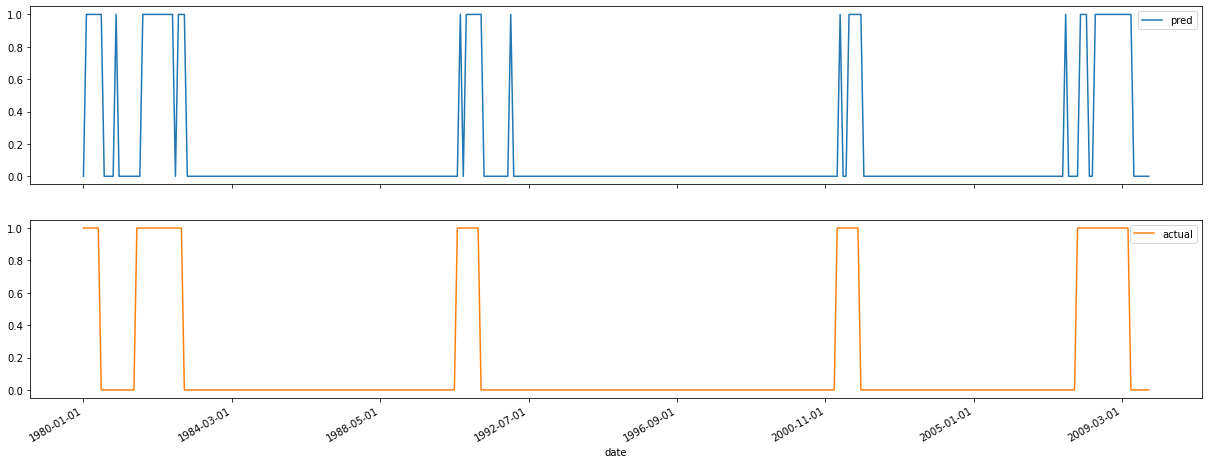

In [14]:
gb_class_rep.plot(x='date', subplots=True, figsize=(21,8))

## Concluding Thoughts

Overall, our models were very successful in predicting recessions when comparing actual recessions as shown by the graphical representations and the classification reports. Depending on the conditions of the recession, different indicators responded differently during the multiple recession periods. We originally beleived that data for alcohol sales and copper prices would contribute to the prediction of a recessionary period, however our models found that they were often weighted very low in the decision as to output 1 or 0. Although all the models accurately predicted when recessions occurred, gradient boosted trees was the most accurate at predicting a recession without lag. The model did seem to second guess itself but nearly always predicted a recession accurately for the time period they actually occurred. In our indicators we found that alcohol and copper, although not sufficient to be used in predicting a recession are most likely lagging factors that are affected during a recession. 

In this project, we were able to research and construct a model to test entirely on our own. In the future we could further develop this model by choosing other indicators and fine tuning the parameters of the model. 